In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def read_data(location):
    df=pd.read_csv(location)
    return df

In [3]:
floc= "./Housing.csv"
df= read_data(floc)

In [4]:
def data_overview(df):
    print(f"No of rows {df.shape[0]}")
    print(f"No of colums {df.shape[1]}")
    print(f"Columns: {df.columns}")
    print(f"Null Vaalues = {df.isnull().sum()}")

In [5]:
data_overview(df)

No of rows 545
No of colums 13
Columns: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Null Vaalues = price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
test=df.sample(frac=0.30,random_state=42)
train= df.drop(test.index)
target=test['price']/test['price'].max()

In [7]:
n=train.shape[0]
x=train['area']/train['area'].max()
y=train['price']/train['price'].max()
def simple_LR(train):
    sum_xy=(x*y).sum()
    sum_x= x.sum()
    sum_y=y.sum()
    sum_x_sq=(x**2).sum()
    m=(n*sum_xy-sum_x*sum_y)/(n*sum_x_sq-sum_x**2)
    c=(sum_y-m*sum_x)/n
    y_cap=m*x+c
    return y_cap,m,c

In [8]:
predicted,m,c=simple_LR(train)

In [9]:
def predict_price(inp_feature,m,c):
    inp_feature_normal=inp_feature/inp_feature.max()
    predicted_price=m*inp_feature_normal+c
    return predicted_price

In [10]:
predicted_test_prices = predict_price(test['area'], m, c)

In [11]:
comp=pd.DataFrame({"Actual":target, "Predicted": predicted_test_prices})
print(comp.head(10))

       Actual  Predicted
316  0.305263   0.466275
77   0.500000   0.493292
360  0.278947   0.382523
90   0.484211   0.425750
493  0.210526   0.378920
209  0.368421   0.503198
176  0.394737   0.584248
249  0.341579   0.425299
516  0.184211   0.346500
426  0.252105   0.322185


In [12]:
def MSE(target,predicted_test_price):
    N=test.shape[0]
    se=(target-predicted_test_price)**2
    mse=se.sum()/N
    return mse

In [13]:
print(f"MSE Value={MSE(target,predicted_test_prices)}")

MSE Value=0.024035697216621504


In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X=df[['area']]
X=X/X.max()
Y=df['price']
Y=Y/Y.max()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Create and fit the model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)
mse_value = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 0.018056362280273734


In [15]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))

       Actual  Predicted
316  0.305263   0.384150
77   0.500000   0.404426
360  0.278947   0.321295
90   0.484211   0.353737
493  0.210526   0.318592
209  0.368421   0.411861
176  0.394737   0.472688
249  0.341579   0.353399
516  0.184211   0.294261
426  0.252105   0.276013


In [16]:
print(f"SKlearn Coefficient: {reg.coef_[0]}")
print(f"SKlearn Intercept: {reg.intercept_}")
print(f"my Coefficient: {m}")
print(f"Intercept: {c}")

SKlearn Coefficient: 0.5474467317771203
SKlearn Intercept: 0.18477154348775263
my Coefficient: 0.5943707373580164
Intercept: 0.20060910435813142


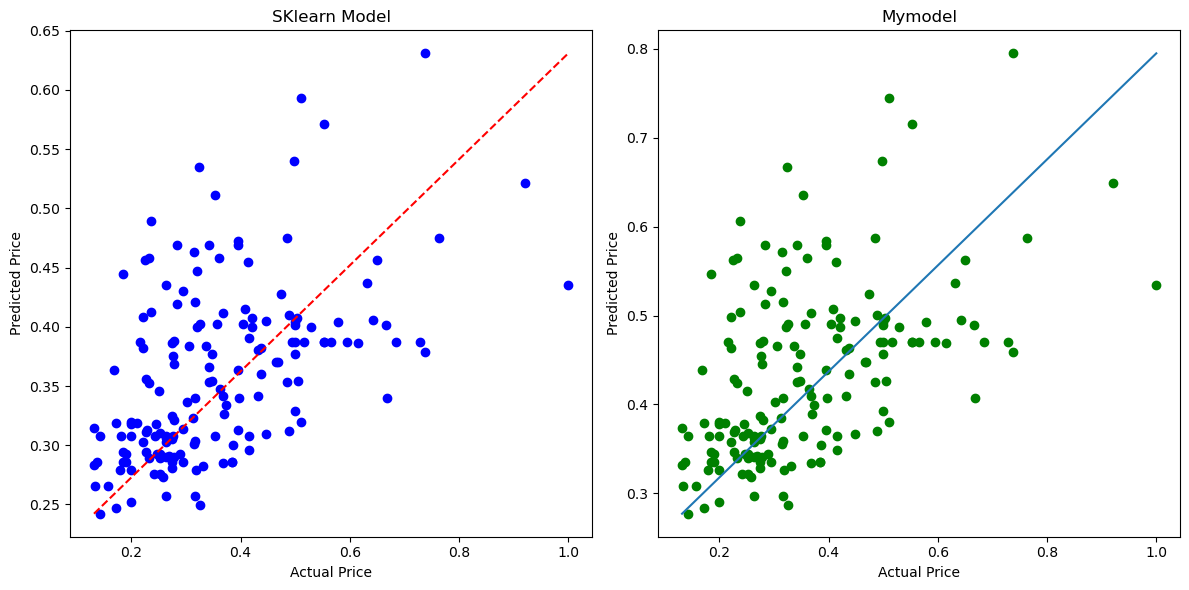

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
axs[0].plot([y_test.min(), y_test.max()],[y_pred.min(), y_pred.max()],"r--")
axs[0].set_title("SKlearn Model")
axs[0].scatter(y_test, y_pred, color='blue')
axs[0].set_xlabel('Actual Price')
axs[0].set_ylabel('Predicted Price')

axs[1].plot([target.min(),target.max()],[predicted_test_prices.min(),predicted_test_prices.max()])
axs[1].set_title("Mymodel")
axs[1].scatter(target,predicted_test_prices,color='green')
axs[1].set_xlabel('Actual Price')
axs[1].set_ylabel('Predicted Price')

plt.tight_layout()
plt.show()
